In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('eda_data.csv')

In [8]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

In [9]:
df_dum = pd.get_dummies(df_model)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import statsmodels.api as sm

In [14]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.48e-94
Time:                        11:09:21   Log-Likelihood:                -3311.7
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6012      6.720      6.488      0.000      30.404      56.799
Rating                                                3.6051      1.937      1.861      0.063      -0.200       7.410
num_comp                                              2.2511      0.868      2.593      0.010       0.546       3.956
hourly                                              -36.5821      9.173     -3.988      0.000     -54.597     -18.567
employer_provided                                    31.3641     11.524      2.722      0.007       8.731      53.997
same_state                                            2.4813      2.619      0.948      0.344      -2.661       7.624
age                                                   0.0348      0.030      1.160      0.246      -0.024       0.094
python_yn                                             8.1363      2.523      3.224      0.001       3.180      13.092
spark                                                -0.5715      2.921     -0.196      0.845      -6.307       5.164
aws                                                   1.1228      2.736      0.410      0.682      -4.250       6.496
excel                                                -0.4020      2.268     -0.177      0.859      -4.855       4.051
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6196      8.629      1.578      0.115      -3.328      30.567
Size_1 to 50 employees                                1.1087      6.501      0.171      0.865     -11.659      13.876
Size_10000+ employees                                -2.9049      5.801     -0.501      0.617     -14.297       8.487
Size_1001 to 5000 employees                           6.1218      3.880      1.578      0.115      -1.498      13.741
Size_201 to 500 employees                             2.2418      3.873      0.579      0.563      -5.364       9.848
Size_5001 to 10000 employees                         -3.8783      5.443     -0.713      0.476     -14.568       6.811
Size_501 to 1000 employees                            2.1611      4.059      0.532      0.595      -5.811      10.133
Size_51 to 200 employees                              4.1816      4.422      0.946      0.345      -4.502      12.865
Size_Unknown                                         20.9498     13.993      1.497      0.135      -6.532      48.432
Type of ownership_-1                                 13.6196      8.629      1.578      0.115      -3.328      30.567
Type of ownership_College / University                6.4736     17.737      0.365      0.715     -28.360      41.307
Type of ownersh

In [15]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [16]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.77023361366959

In [18]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-19.26251583392883

In [19]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
print(error)

[-20.169580157847353, -19.816157214818706, -19.61023022749826, -19.49331282633987, -19.44058343550569, -19.41916690363423, -19.374039973268196, -19.338784883194993, -19.3066402055867, -19.290410000625982, -19.282529843873117, -19.269665019228018, -19.26251583392883, -19.265081368122253, -19.265377831991085, -19.263879673091136, -19.262612136033486, -19.2637515397364, -19.266254048313474, -19.269298595853954, -19.275715458142294, -19.281236120461077, -19.290781084773965, -19.306641622129963, -19.330316092465747, -19.357823176262816, -19.378356174660393, -19.39568936912049, -19.41274592294106, -19.428545065784405, -19.44573519905667, -19.46495856119631, -19.481810106966293, -19.500049552668475, -19.520710488836297, -19.54304487665161, -19.565374560489428, -19.589258865187272, -19.6142485398676, -19.641021082529758, -19.666281482171726, -19.692363204808434, -19.71880151205573, -19.746712330550654, -19.775467842849967, -19.804009255378357, -19.831931891056424, -19.856427573728055, -19.8805

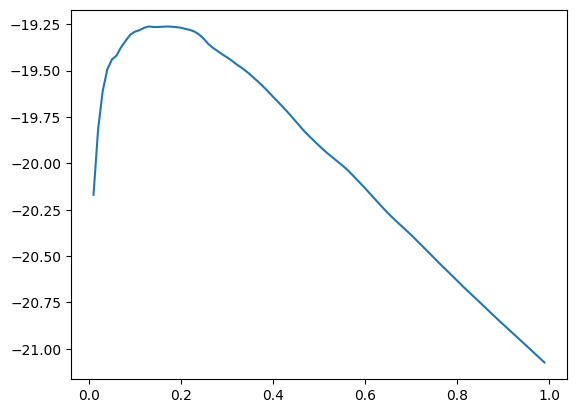

In [20]:
plt.plot(alpha,error)

In [21]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
12,0.13,-19.262516


In [22]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [42]:
rf1 = RandomForestRegressor(criterion='absolute_error', n_estimators=190)
rf1.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=190)

In [23]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 100))

-13.211775

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error','absolute_error'), 'max_features':(1.0,'sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

In [65]:
gs.best_score_

-14.82292491438564

In [67]:
gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', n_estimators=190)

In [28]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
#tpred_rf = gs.best_estimator_.predict(X_test)
tpred_rf = rf1.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(y_test,tpred_lm)

566207.4079411166

In [34]:
mean_absolute_error(y_test,tpred_lml)

19.66540217867269

In [31]:
mean_absolute_error(y_test,tpred_rf)

11.101059696220418

In [32]:
mean_absolute_error(y_test,(tpred_rf+tpred_lml)/2)

14.835525649990627

In [43]:
import pickle
pickl = {'model': rf1 }
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [44]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [56]:
model.predict(np.array(list(X_test.iloc[6,:])).reshape(1,-1))[0]

c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


144.80263157894737